Dataset size: (986, 11)
r2 score is (Accuracy):  0.6224788564783281
mean_sqrd_error is:  14231566.811501382
root_mean_squared error of the model is: 3772.474892096882
mean_absolute_error of the model is:  2607.504836157685


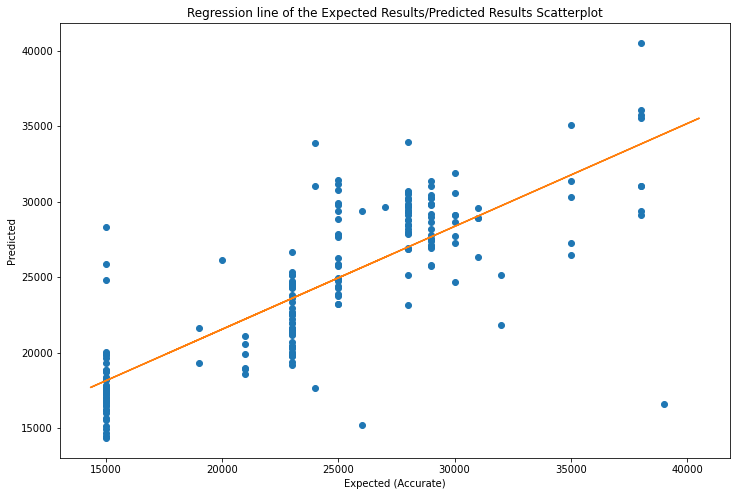

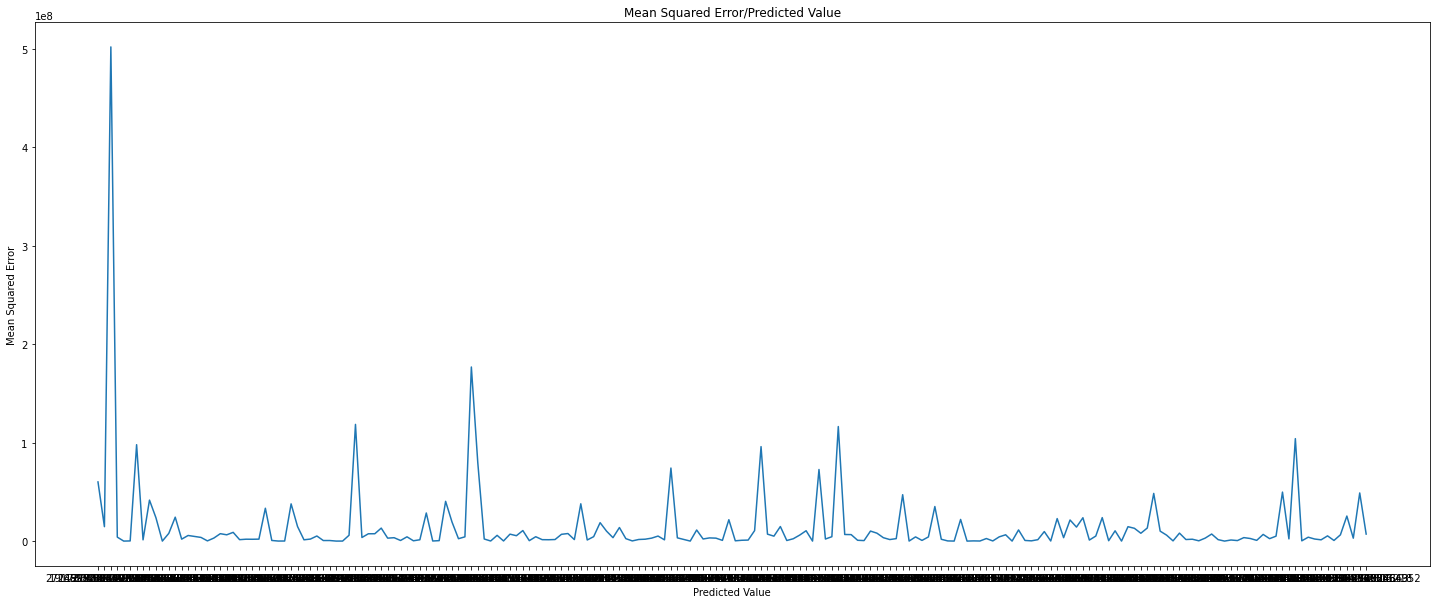

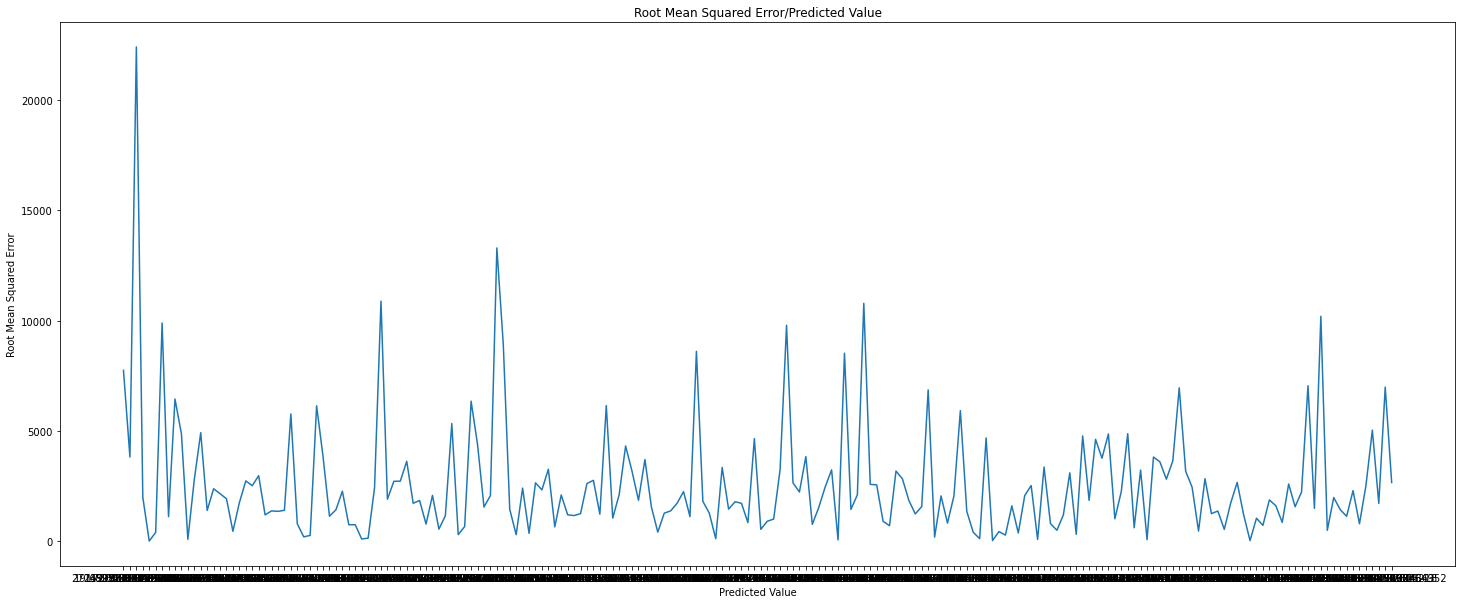

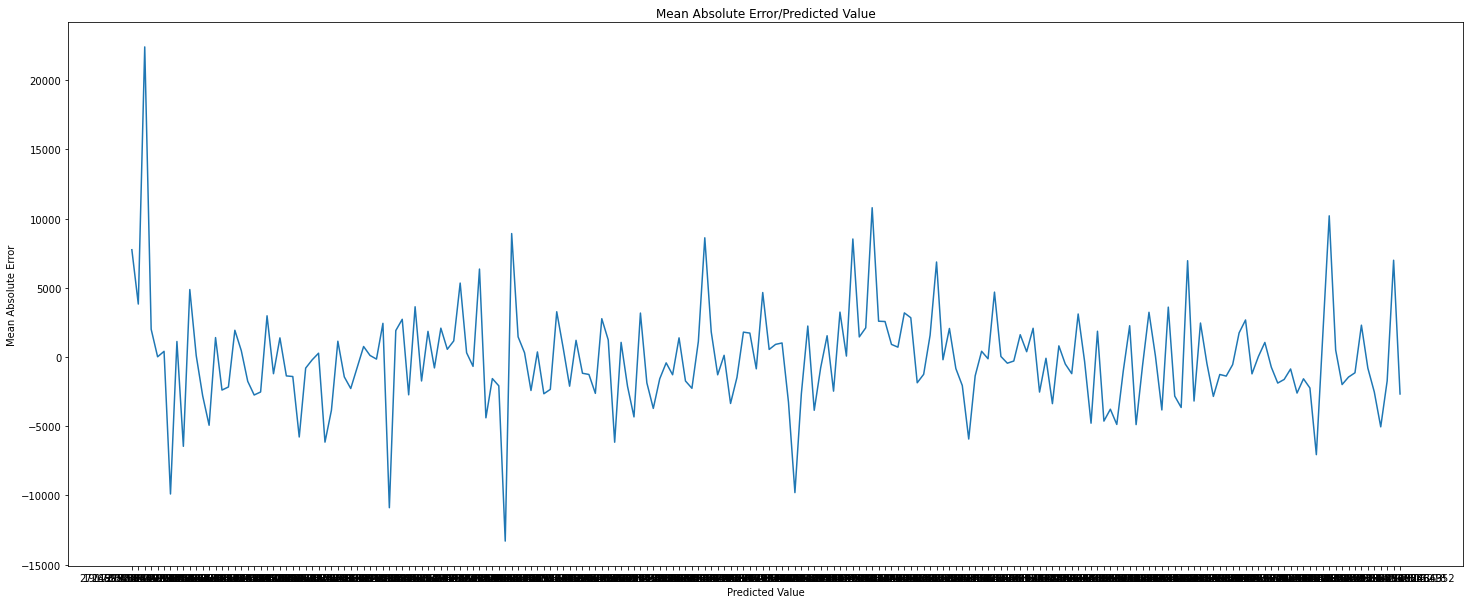

In [727]:
#import libraries and dependancies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from random import randint
import joblib

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

medical_data = pd.read_csv('Medicalpremium.csv')

dataset = medical_data.copy()

print(f'Dataset size: {dataset.shape}')

X = dataset.drop(columns=['PremiumPrice']) 
Y = dataset['PremiumPrice'] 

#initialize the Linear Regression model
model = LinearRegression()

#create train sets and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=randint(0,99999999))

#train
model.fit(X_train,Y_train)


predictions = model.predict(X_test)

#accuracy 
score = r2_score(Y_test,predictions)

#save the model
joblib.dump(model,'medicalModel.joblib')

#print results
print('r2 score is (Accuracy): ',score)
print('mean_sqrd_error is: ',mean_squared_error(Y_test,predictions))
print(f'root_mean_squared error of the model is: {mean_squared_error(Y_test,predictions,squared=False)}')
print('mean_absolute_error of the model is: ',mean_absolute_error(Y_test, predictions))



errors = list()
expected = Y_test.tolist()
predicted = predictions.copy()

#create basic scatterplot
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)
plt.title('Regression line of the Expected Results/Predicted Results Scatterplot')
plt.xlabel('Expected (Accurate)')
plt.ylabel('Predicted')
plt.plot(expected, predicted, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(expected, predicted, 1)

#add linear regression line to scatterplot 
plt.plot(predicted, m*predicted+b)

# print(expected,predicted)
for i in range(len(expected)):
	# calculate error
	err = (expected[i] - predicted[i])**2
	# store error
	errors.append(err)

f = plt.figure()
f.set_figwidth(25)
f.set_figheight(10)
plt.plot(errors)
plt.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
plt.title('Mean Squared Error/Predicted Value')
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.show()

# Root Mean Squared error
Rerrors = list()
for i in range(len(expected)):
	# calculate error
	err = abs((expected[i] - predicted[i]))
	# store error
	Rerrors.append(err)
# plot errors
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(10)
plt.plot(Rerrors)
plt.title('Root Mean Squared Error/Predicted Value')
plt.xticks(ticks=[i for i in range(len(Rerrors))], labels=predicted)
plt.xlabel('Predicted Value')
plt.ylabel('Root Mean Squared Error')
plt.show()

#Mean Absolute error
Aerrors = list()
for i in range(len(expected)):
	# calculate error
	err = (expected[i] - predicted[i])
	# store error
	Aerrors.append(err)
# plot errors
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(10)
plt.plot(Aerrors)
plt.title('Mean Absolute Error/Predicted Value')
plt.xticks(ticks=[i for i in range(len(Aerrors))], labels=predicted)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Absolute Error')
plt.show()



r2 score is  0.918865653149148


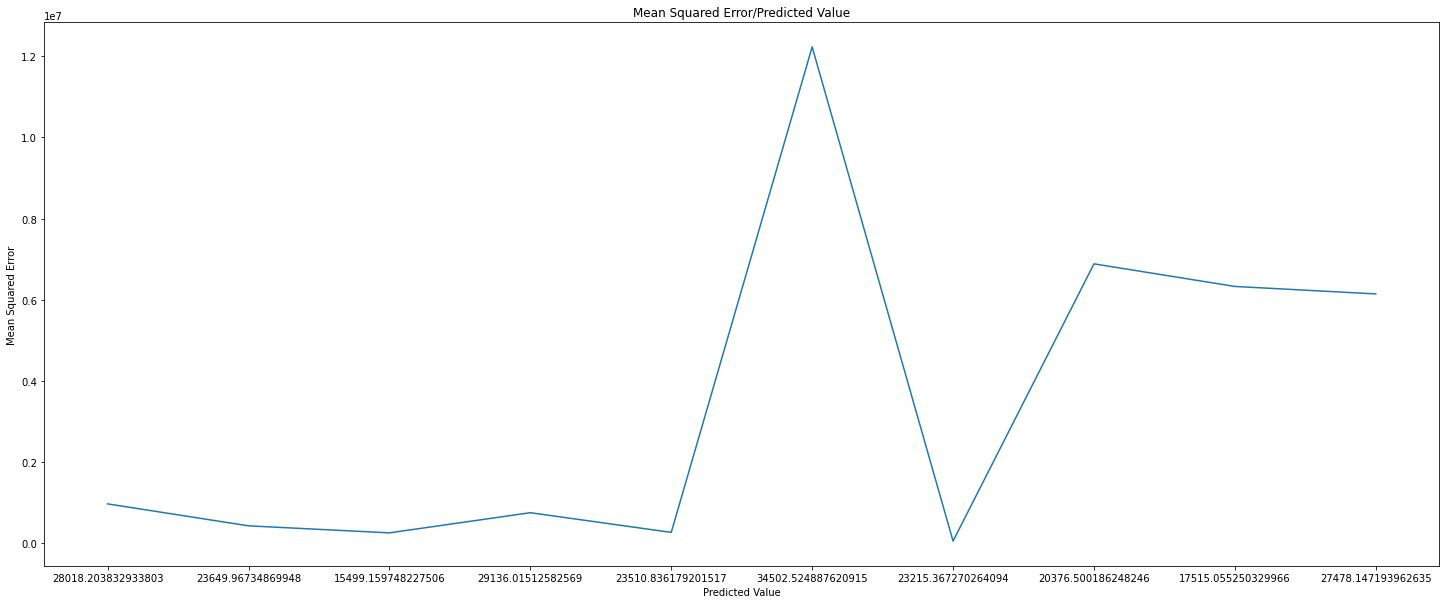

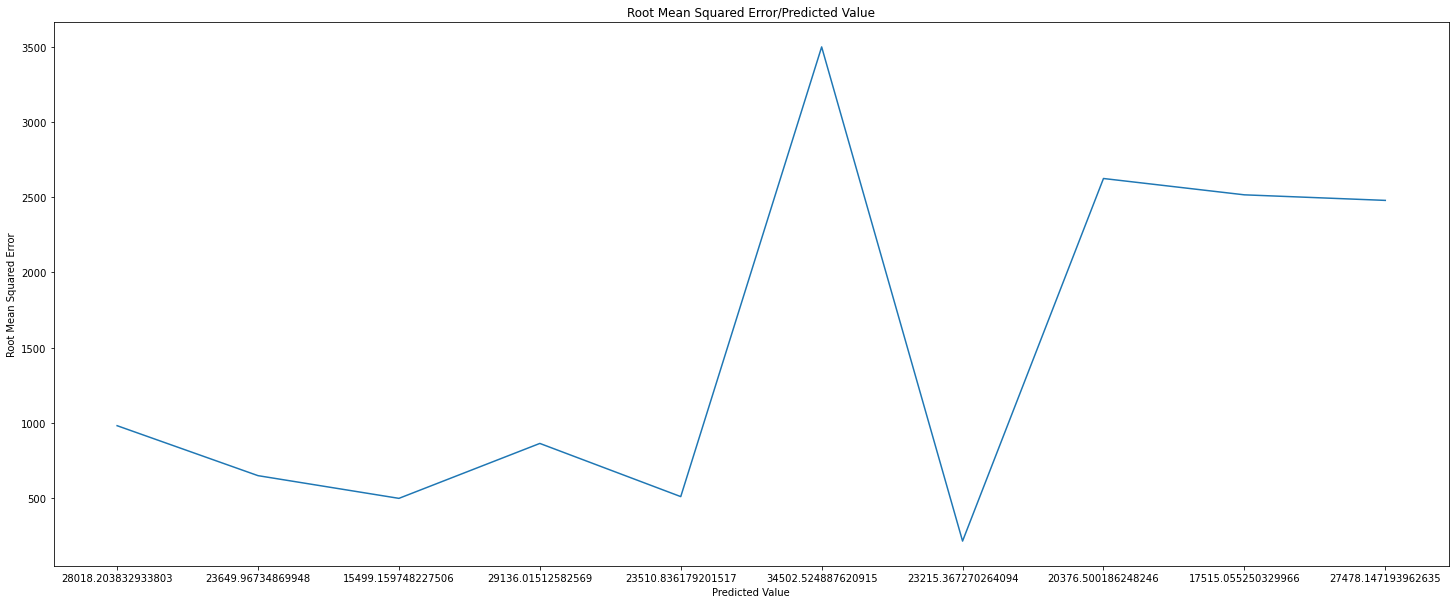

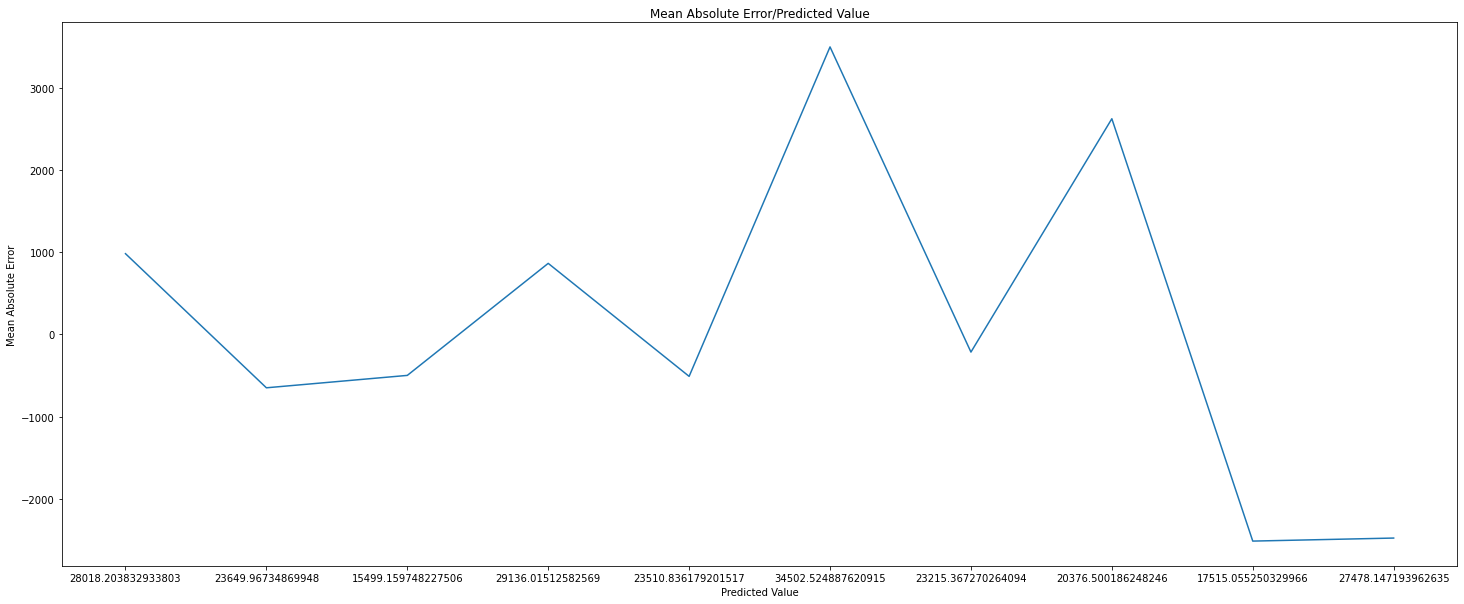

In [724]:
jbl2 = joblib.load('medicalModel.joblib') 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.01,random_state=randint(0,99999999))

# predict
X_predictions = jbl2.predict(X_test)

#fine r2 score
score = r2_score(Y_test,X_predictions)
print('r2 score is ',score)

#calculate errors

#Mean Squared Error
errors = list()
expected = Y_test.tolist()
predicted = X_predictions.copy()
# print(expected,predicted)
for i in range(len(expected)):
	# calculate error
	err = (expected[i] - predicted[i])**2
	# store error
	errors.append(err)

f = plt.figure()
f.set_figwidth(25)
f.set_figheight(10)
plt.plot(errors)
plt.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
plt.title('Mean Squared Error/Predicted Value')
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.show()

# Root Mean Squared error
Rerrors = list()
for i in range(len(expected)):
	# calculate error
	err = abs((expected[i] - predicted[i]))
	# store error
	Rerrors.append(err)
# plot errors
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(10)
plt.plot(Rerrors)
plt.title('Root Mean Squared Error/Predicted Value')
plt.xticks(ticks=[i for i in range(len(Rerrors))], labels=predicted)
plt.xlabel('Predicted Value')
plt.ylabel('Root Mean Squared Error')
plt.show()

#Mean Absolute error
Aerrors = list()
for i in range(len(expected)):
	# calculate error
	err = (expected[i] - predicted[i])
	# store error
	Aerrors.append(err)
# plot errors
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(10)
plt.plot(Aerrors)
plt.title('Mean Absolute Error/Predicted Value')
plt.xticks(ticks=[i for i in range(len(Aerrors))], labels=predicted)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Absolute Error')
# plotting a line plot after changing it's width and height
plt.show()